In [90]:
def classificateWithNumbersThreeTarget(value):
    target=0
    if(value>=0.0015):
        target=1
    elif(value<=-0.0015):
        target=-1
    else:
        target=0
    return target




def graph(test_y,yhat,mennyiseg,oszlop):
    valos=test_y[:,oszlop-1][:mennyiseg]
    predikt=yhat[:,oszlop-1][:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=True, cbar_kws={"shrink": .7})
    sns.set(font_scale=2)
    plt.show();
    
    
    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrikak(y_true,y_pred):
    print(mean_squared_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))
from numpy import hstack
import array
from numpy import array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def kirajzoltatas(yhat,test_y):
    yhat = pd.DataFrame(yhat, columns=['Predicted'])
    test_y2 = pd.DataFrame(test_y, columns=['Real'])
    merge=test_y2.join(yhat)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:100], linewidth=3)
    plt.show()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
    
#data1 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_06', sep=",", header=None)
#data1.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data2 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_07', sep=",", header=None)
#data2.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

#data3 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_08', sep=",", header=None)
#data3.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data4 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_09', sep=",", header=None)
data4.columns = ["time", "open", "high", "low","close","volume"]

#data= pd.concat([data1,data2,data3,data4], axis=0)
data=data4.dropna()
data=data[['time','open','high','low','close','volume']]
#data

#data=data4
    

Setup Complete


# csusztatás

In [49]:
close_values=data.close.values
train = close_values[0 : int(len(close_values)*0.8)]
test = close_values[int(len(close_values)*0.8):]

In [50]:
n_steps_in, n_steps_out = 30, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

# stacked LSTM tanitas | 50 neuron | steps=30,5 | epoch=20 | univariate

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=20, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/20
8870/8870 [==============================] - 177s 20ms/step - loss: 6719228.5000
Epoch 2/20
8870/8870 [==============================] - 176s 20ms/step - loss: 45949.6797
Epoch 3/20
8870/8870 [==============================] - 177s 20ms/step - loss: 70475.4688
Epoch 4/20
8870/8870 [==============================] - 189s 21ms/step - loss: 26491.0156
Epoch 5/20
8870/8870 [==============================] - 247s 28ms/step - loss: 23801.4492
Epoch 6/20
8870/8870 [==============================] - 270s 30ms/step - loss: 22090.7520
Epoch 7/20
8870/8870 [==============================] - 203s 23ms/step - loss: 18945.7637
Epoch 8/20
8870/8870 [==============================] - 168s 19ms/step - loss: 17016.7148
Epoch 9/20
8870/8870 [==============================] - 158s 18ms/step - loss: 14415.6025
Epoch 10/20
8870/8870 [==============================] - 152s 17ms/step - loss: 12971.4287
Epoch 11/20
8870/8870 [==============================] - 151s 17ms/step - loss: 11767.0752
Epoch 

20

In [52]:
n_steps=30
test_X, test_y = split_sequence(test, 30, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [53]:
metrikak(test_y,yhat)

99987.47844758681
0.5487093017071472


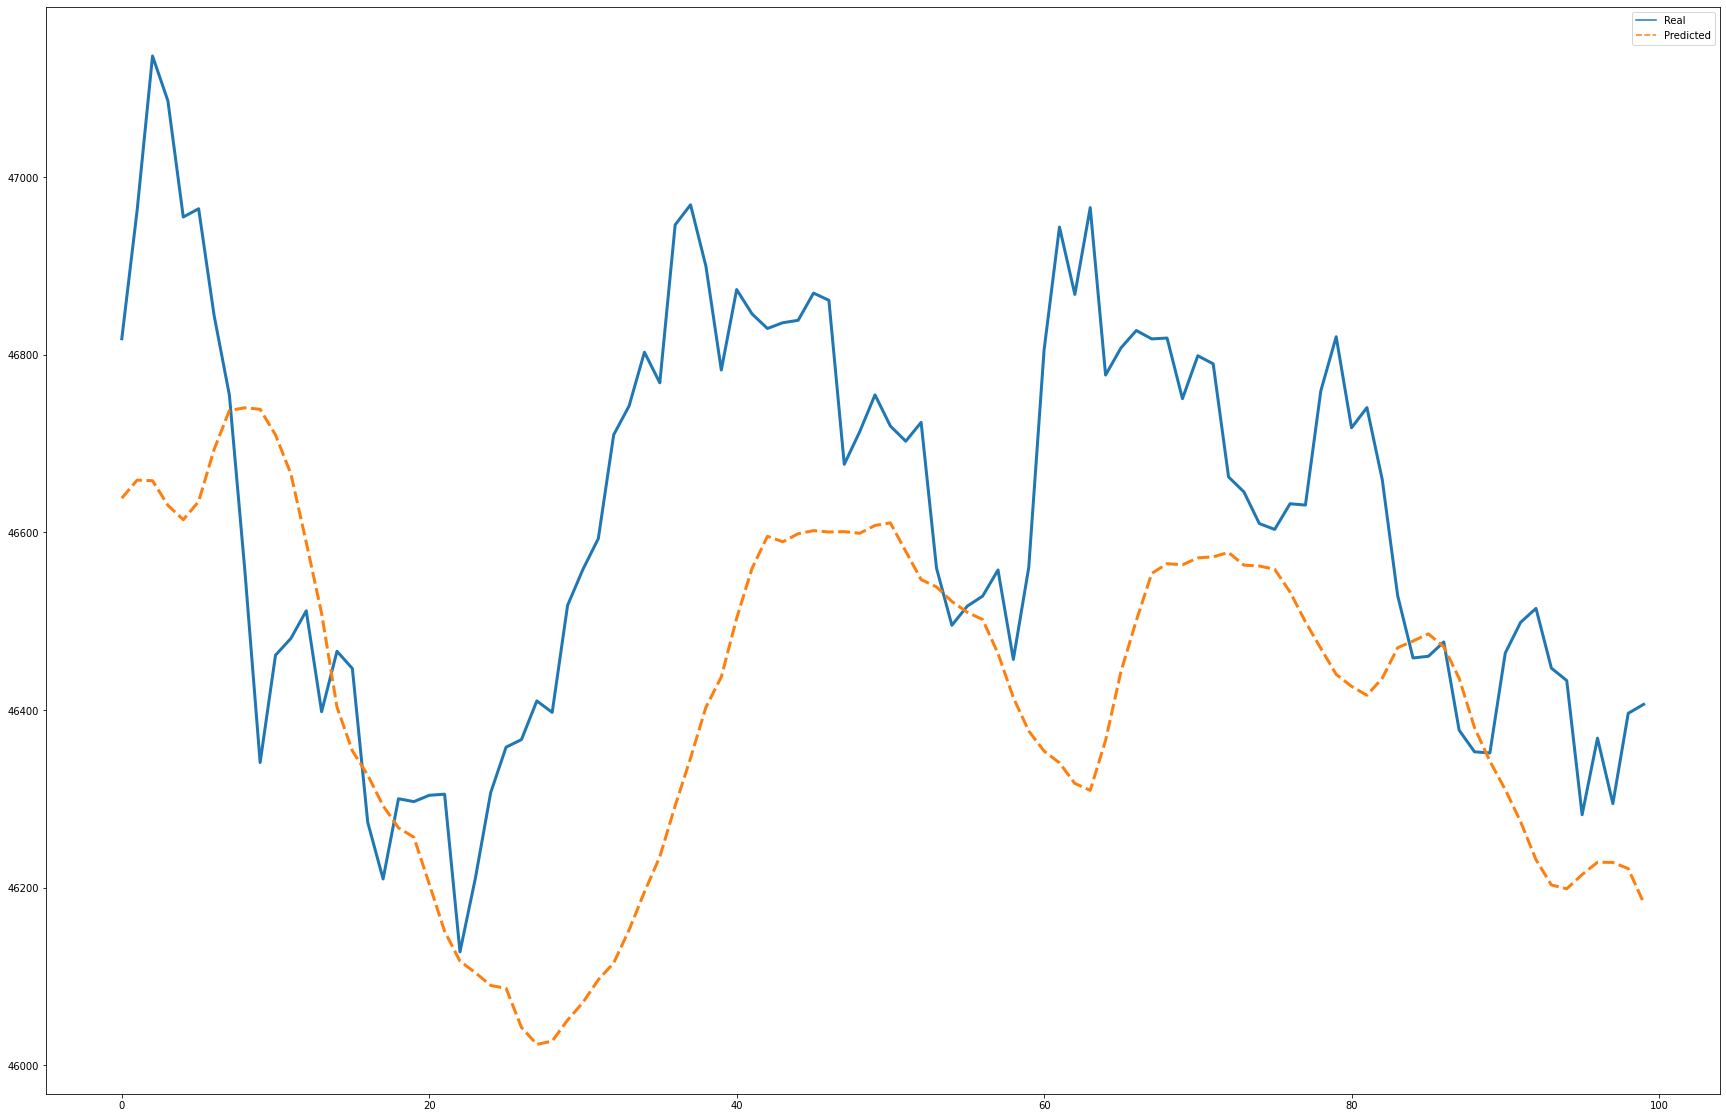

In [57]:
graph(test_y,yhat,100,4)

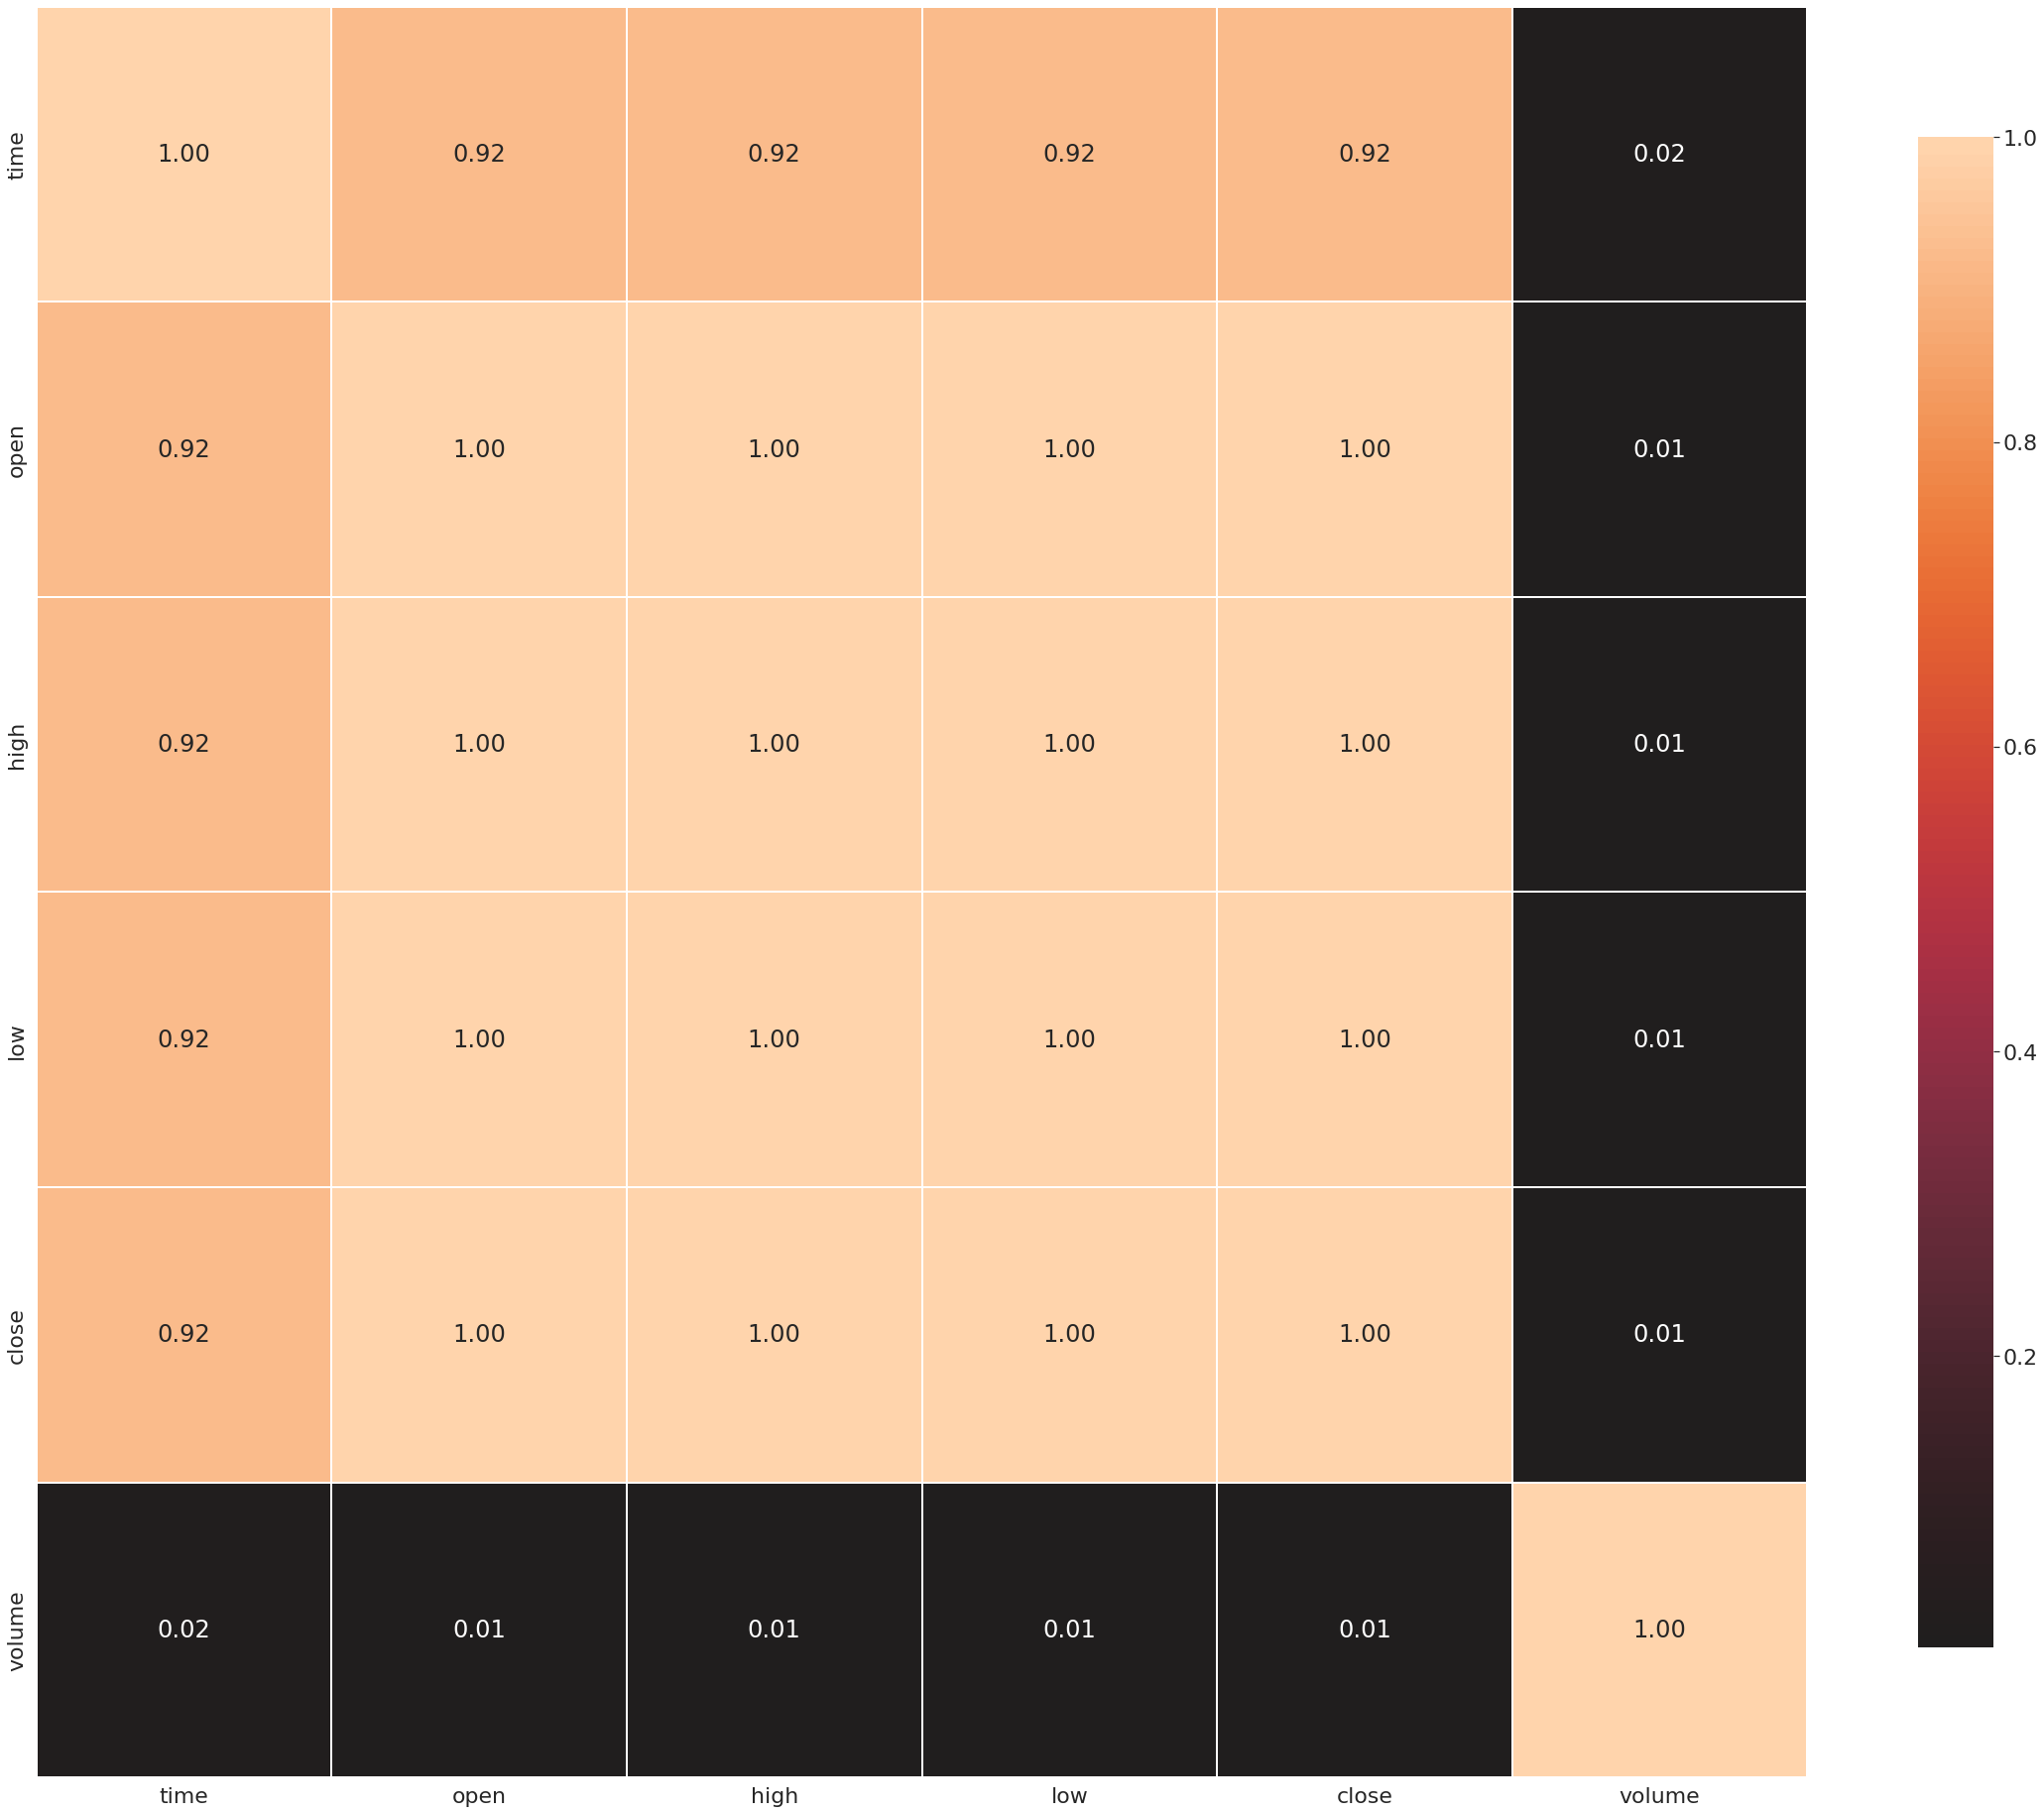

In [75]:
correlation_heatmap(data)

# stacked LSTM tanitas | 100 neuron | steps=30,5 | epoch=30 | univariate

In [60]:
n_steps_in, n_steps_out = 30, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=30, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/30
8870/8870 [==============================] - 295s 33ms/step - loss: 14317751.0000
Epoch 2/30
8870/8870 [==============================] - 281s 32ms/step - loss: 3807569.7500
Epoch 3/30
8870/8870 [==============================] - 276s 31ms/step - loss: 23534.6914
Epoch 4/30
8870/8870 [==============================] - 278s 31ms/step - loss: 34721.6992
Epoch 5/30
8870/8870 [==============================] - 253s 28ms/step - loss: 49050.6797
Epoch 6/30
8870/8870 [==============================] - 253s 28ms/step - loss: 37031.4805


6

In [62]:
n_steps=30
test_X, test_y = split_sequence(test, 30, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [63]:
metrikak(test_y,yhat)

89147.33798447253
0.4088398860403222


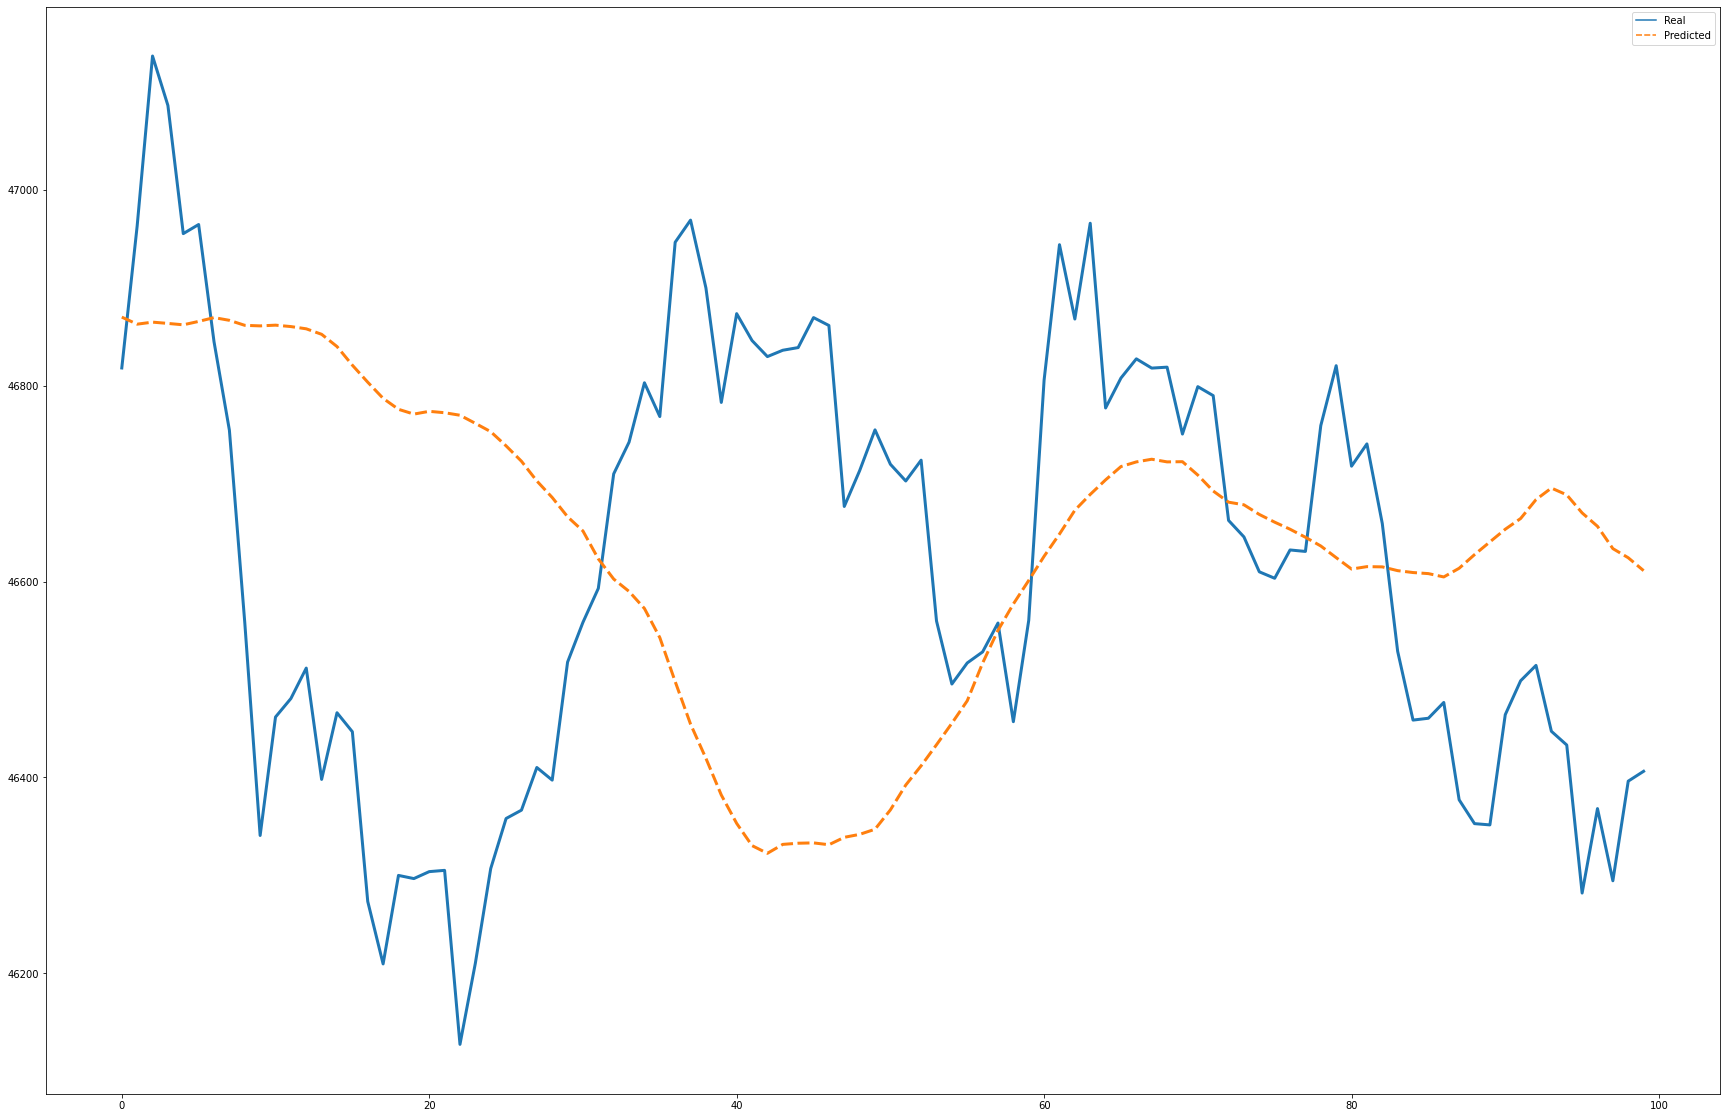

In [64]:
graph(test_y,yhat,100,4)

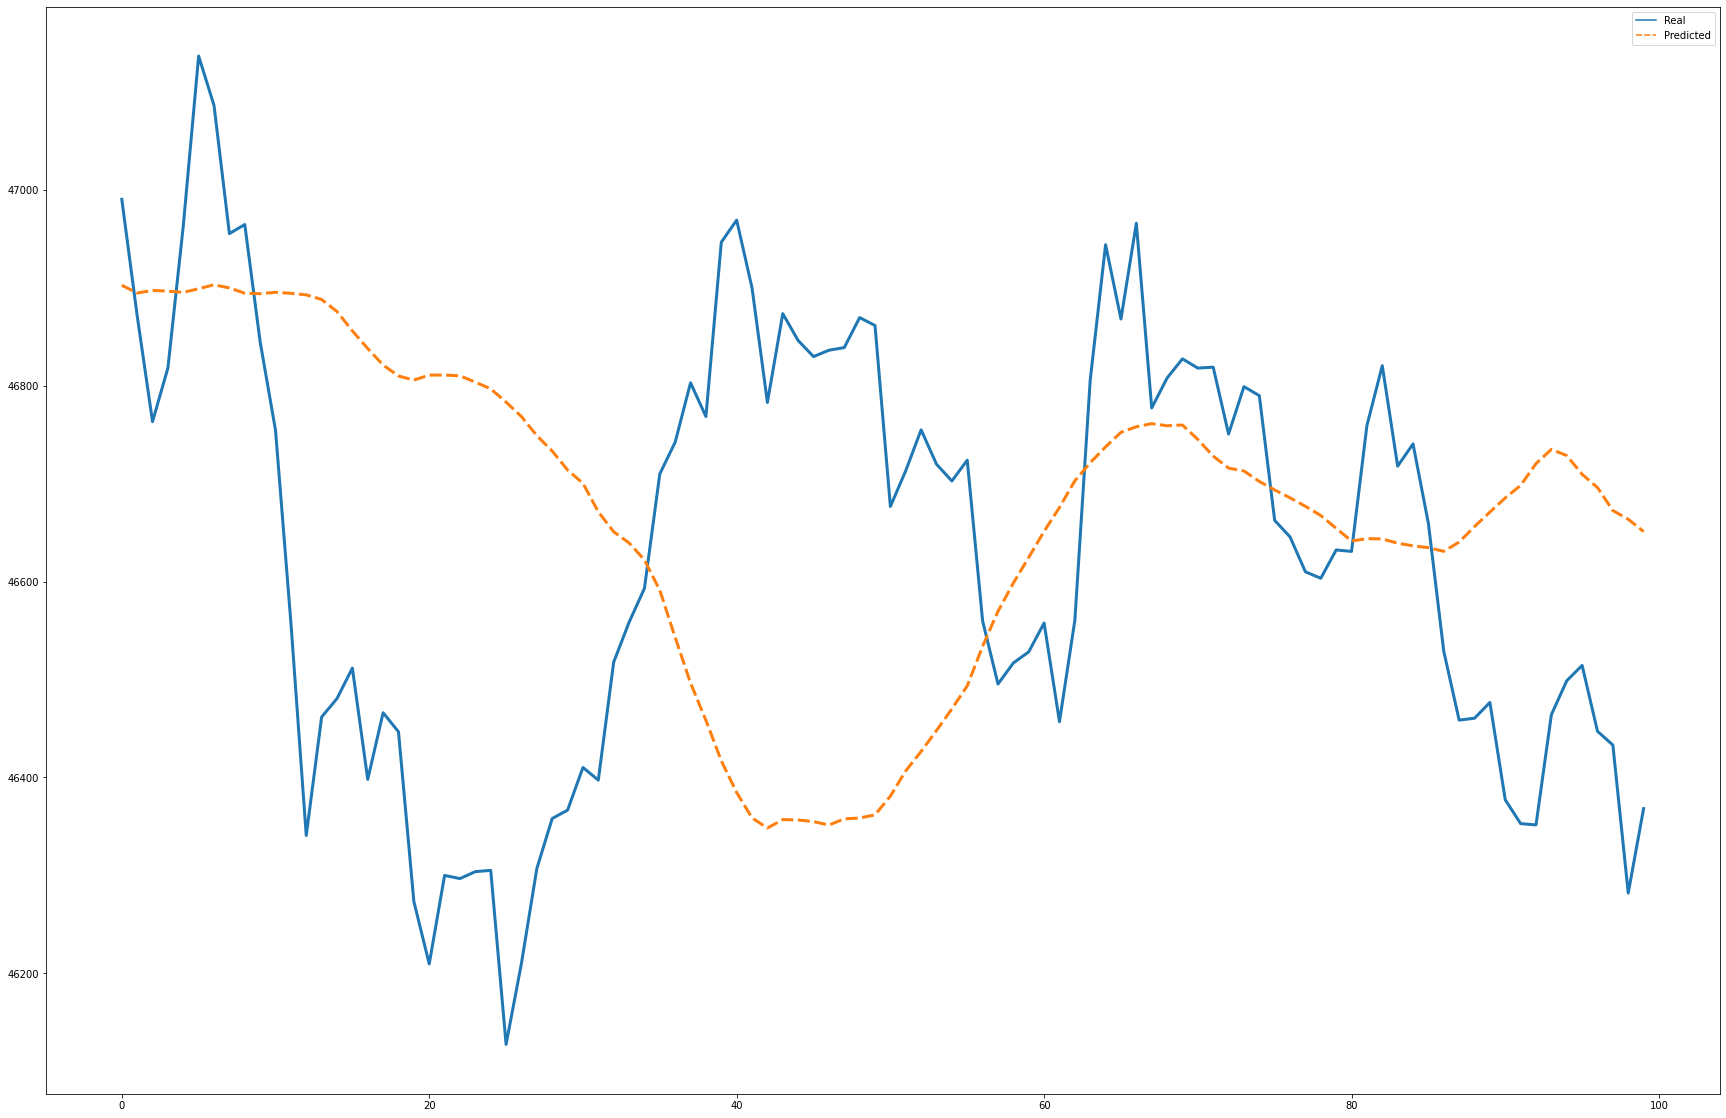

In [65]:
graph(test_y,yhat,100,1)

# stacked LSTM tanitas | 50 neuron | steps=10,5 | epoch=40 | univariate MSE:23640

In [72]:
n_steps_in, n_steps_out = 10, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [73]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=70, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/70
8871/8871 [==============================] - 111s 12ms/step - loss: 1812281.7500
Epoch 2/70
8871/8871 [==============================] - 103s 12ms/step - loss: 14086.9824
Epoch 3/70
8871/8871 [==============================] - 103s 12ms/step - loss: 15550.3955
Epoch 4/70
8871/8871 [==============================] - 104s 12ms/step - loss: 15000.9170
Epoch 5/70
8871/8871 [==============================] - 104s 12ms/step - loss: 76155.7891
Epoch 6/70
8871/8871 [==============================] - 104s 12ms/step - loss: 16722.2480
Epoch 7/70
8871/8871 [==============================] - 105s 12ms/step - loss: 12587.7822
Epoch 8/70
8871/8871 [==============================] - 105s 12ms/step - loss: 11785.2031
Epoch 9/70
8871/8871 [==============================] - 105s 12ms/step - loss: 11341.5576
Epoch 10/70
8871/8871 [==============================] - 103s 12ms/step - loss: 195048.4062
Epoch 11/70
8871/8871 [==============================] - 93s 11ms/step - loss: 12820.5068
Epoch 

16

In [74]:
n_steps=10
test_X, test_y = split_sequence(test, 10, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [75]:
metrikak(test_y,yhat)

91948.31833007766
0.4953150466614687


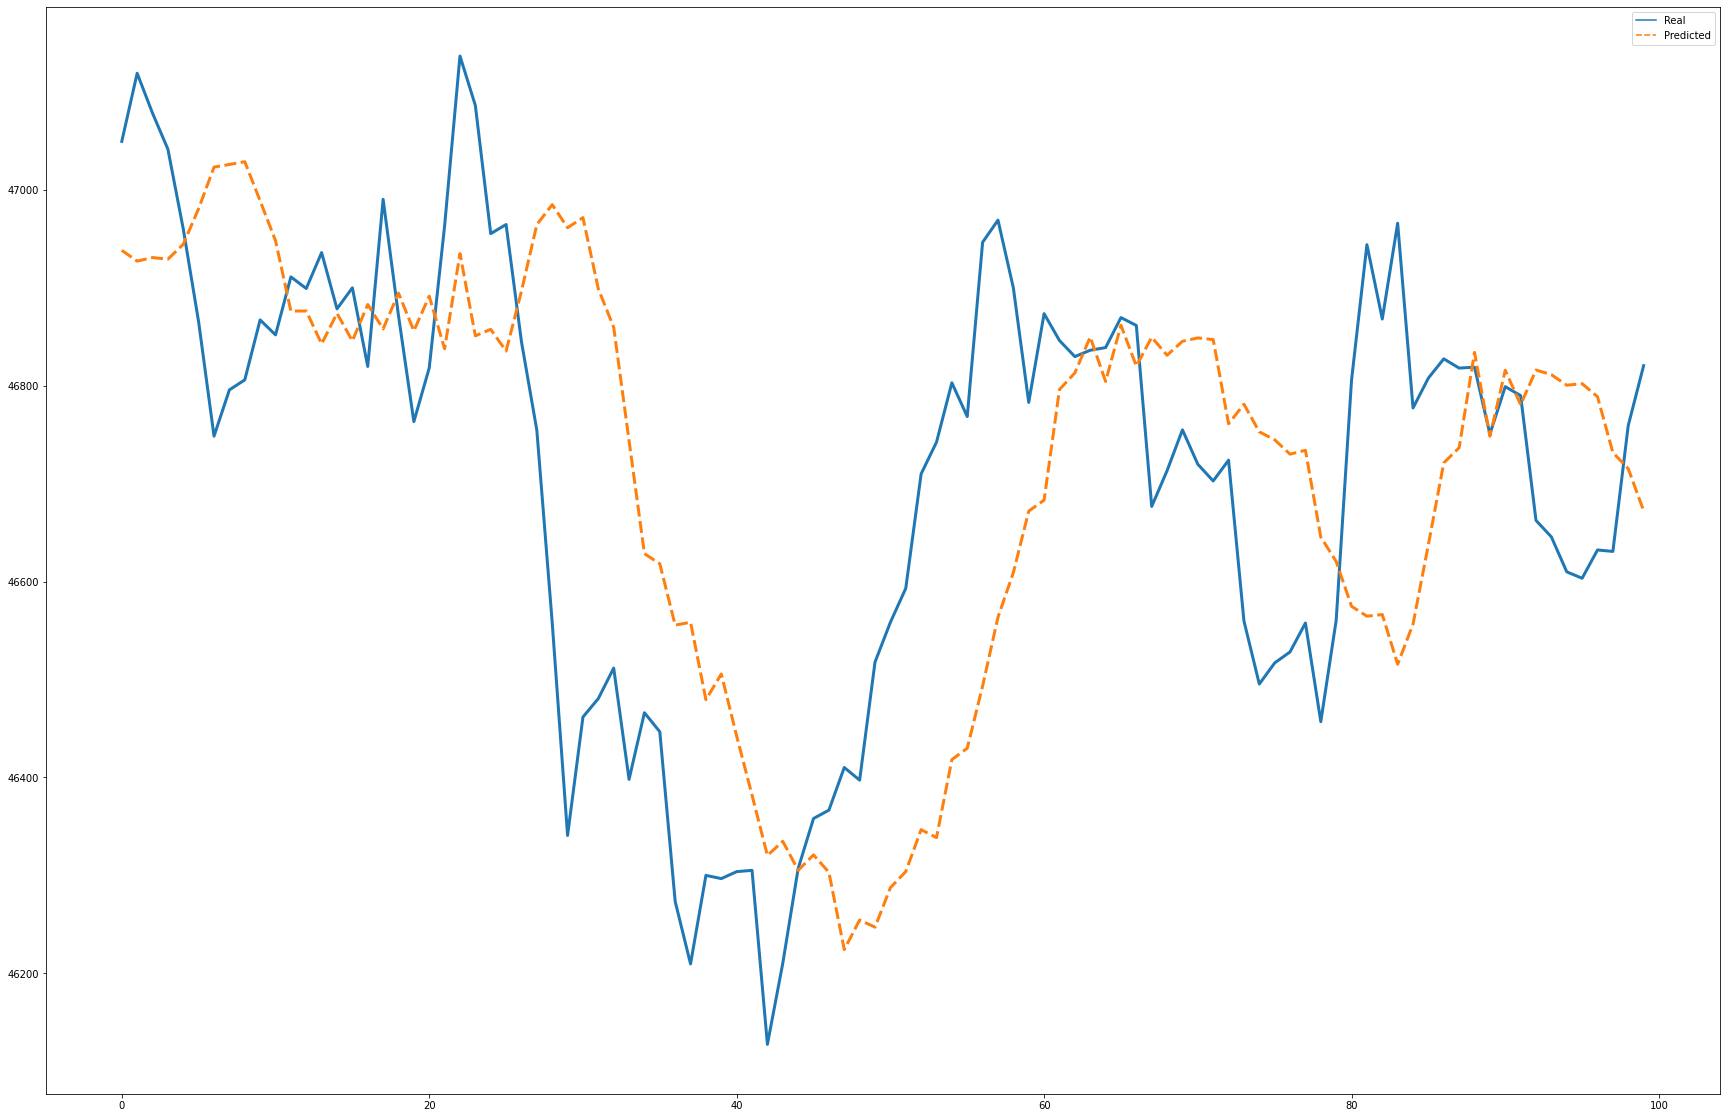

In [70]:
graph(test_y,yhat,100,4)

In [76]:
n_steps_in, n_steps_out = 10, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=70, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/70
8871/8871 [==============================] - 64s 7ms/step - loss: 2841041.7500
Epoch 2/70
8871/8871 [==============================] - 65s 7ms/step - loss: 12922.6074
Epoch 3/70
8871/8871 [==============================] - 65s 7ms/step - loss: 63274.3828
Epoch 4/70
8871/8871 [==============================] - 65s 7ms/step - loss: 14176.5586
Epoch 5/70
8871/8871 [==============================] - 65s 7ms/step - loss: 13744.6729
Epoch 6/70
8871/8871 [==============================] - 58s 7ms/step - loss: 13047.7412
Epoch 7/70
8871/8871 [==============================] - 58s 7ms/step - loss: 12804.3438
Epoch 8/70
8871/8871 [==============================] - 59s 7ms/step - loss: 12430.0771
Epoch 9/70
8871/8871 [==============================] - 58s 7ms/step - loss: 12375.5107
Epoch 10/70
8871/8871 [==============================] - 58s 7ms/step - loss: 11964.3184
Epoch 11/70
8871/8871 [==============================] - 58s 7ms/step - loss: 36732.5117
Epoch 12/70
8871/8871 [=====

70

In [78]:
n_steps=10
test_X, test_y = split_sequence(test, 10, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [79]:
metrikak(test_y,yhat)

18842.23193377863
0.18139663414141785


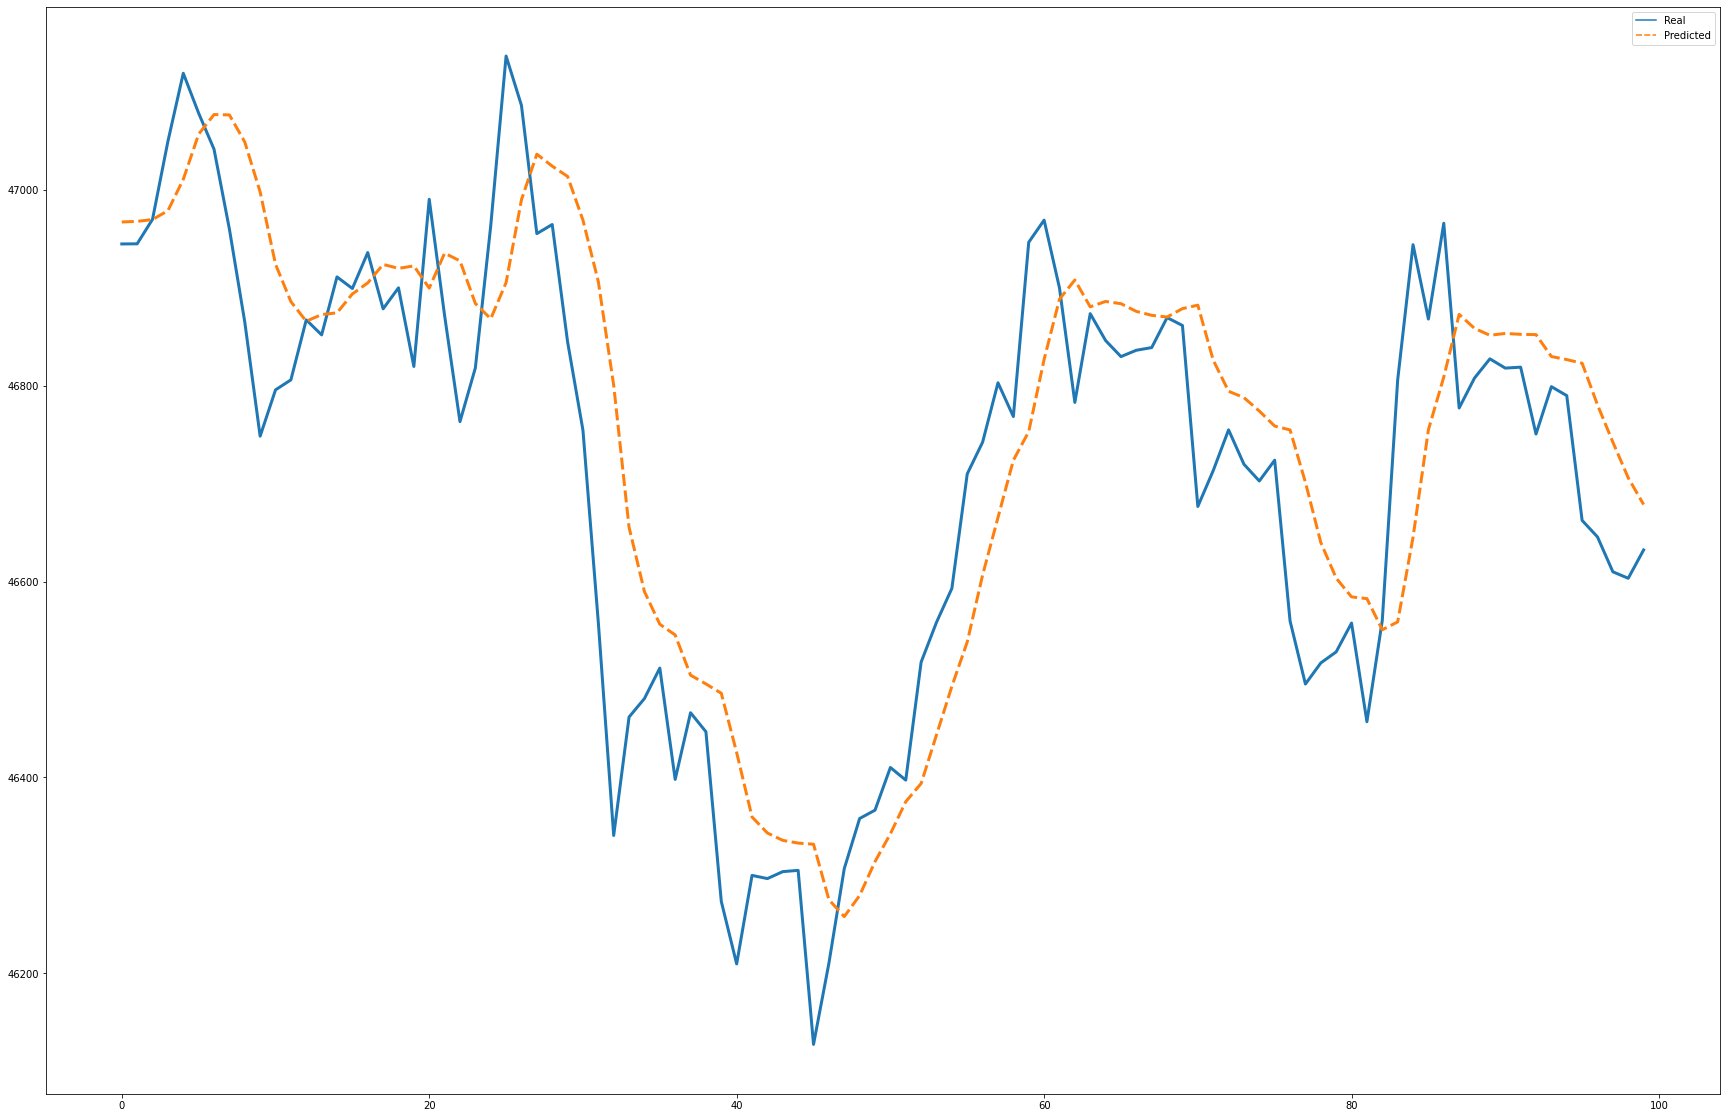

In [81]:
graph(test_y,yhat,100,1)

In [87]:
yhat

array([[46967.21 , 46955.438, 46956.42 , 46964.72 , 46945.28 ],
       [46967.86 , 46956.09 , 46957.07 , 46965.37 , 46945.93 ],
       [46969.695, 46957.92 , 46958.902, 46967.203, 46947.76 ],
       ...,
       [58721.035, 58706.32 , 58707.55 , 58717.93 , 58693.637],
       [58738.996, 58724.277, 58725.508, 58735.89 , 58711.59 ],
       [58744.223, 58729.5  , 58730.734, 58741.117, 58716.812]],
      dtype=float32)

In [107]:
yhat

array([[46967.21 , 46955.438, 46956.42 , 46964.72 , 46945.28 ],
       [46967.86 , 46956.09 , 46957.07 , 46965.37 , 46945.93 ],
       [46969.695, 46957.92 , 46958.902, 46967.203, 46947.76 ],
       ...,
       [58721.035, 58706.32 , 58707.55 , 58717.93 , 58693.637],
       [58738.996, 58724.277, 58725.508, 58735.89 , 58711.59 ],
       [58744.223, 58729.5  , 58730.734, 58741.117, 58716.812]],
      dtype=float32)

In [86]:
test_y

array([[46944.78, 46944.92, 46969.99, 47049.54, 47119.07],
       [46944.92, 46969.99, 47049.54, 47119.07, 47078.3 ],
       [46969.99, 47049.54, 47119.07, 47078.3 , 47041.52],
       ...,
       [58739.95, 58714.31, 58686.  , 58685.81, 58723.84],
       [58714.31, 58686.  , 58685.81, 58723.84, 58760.59],
       [58686.  , 58685.81, 58723.84, 58760.59, 58778.18]])

In [97]:
def percentChange(lastValue,secondLastValue):
        return round((float(lastValue)-secondLastValue)/abs(secondLastValue),6)

In [110]:
def decisionMetric(test_y):
    firstValue=test_y[0][0]
    percentageChangeArray=[]
    for i in range(1,len(test_y)-1):
        osszeg=percentChange(test_y[i][0],firstValue)
        for j in range(1,5):
            osszeg=osszeg+percentChange(test_y[i][j],test_y[i][j-1])
        percentageChangeArray.append(classificateWithNumbersThreeTarget(osszeg))
        firstValue=test_y[i][0]
    return percentageChangeArray
    

In [113]:
valos_target=decisionMetric(test_y)
predikalt_target=decisionMetric(yhat)

In [114]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(valos_target, predikalt_target, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.30      0.05      0.08     17475
           0       0.51      0.98      0.67     35511
           1       0.40      0.01      0.02     17966

    accuracy                           0.50     70952
   macro avg       0.40      0.34      0.26     70952
weighted avg       0.43      0.50      0.36     70952



# 50 steps 100 epoch 50 neuron

In [115]:
n_steps_in, n_steps_out = 50, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [116]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=100, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
8870/8870 [==============================] - 291s 33ms/step - loss: 746831936.0000
Epoch 2/100
8870/8870 [==============================] - 295s 33ms/step - loss: 19392098.0000
Epoch 3/100
8870/8870 [==============================] - 282s 32ms/step - loss: 23345220.0000
Epoch 4/100
8870/8870 [==============================] - 288s 32ms/step - loss: 54618.1953
Epoch 5/100
8870/8870 [==============================] - 273s 31ms/step - loss: 4286271.5000
Epoch 6/100
8870/8870 [==============================] - 273s 31ms/step - loss: 39173.9961
Epoch 7/100
8870/8870 [==============================] - 275s 31ms/step - loss: 152772.3281
Epoch 8/100
8870/8870 [==============================] - 272s 31ms/step - loss: 63371.0820
Epoch 9/100
8870/8870 [==============================] - 263s 30ms/step - loss: 58184.4609
Epoch 10/100
8870/8870 [==============================] - 248s 28ms/step - loss: 441204.7812
Epoch 11/100
8870/8870 [==============================] - 247s 28ms/step - 

100

In [117]:
n_steps=50
test_X, test_y = split_sequence(test, 50, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [118]:
metrikak(test_y,yhat)

17647.630544721695
0.18141186426085318


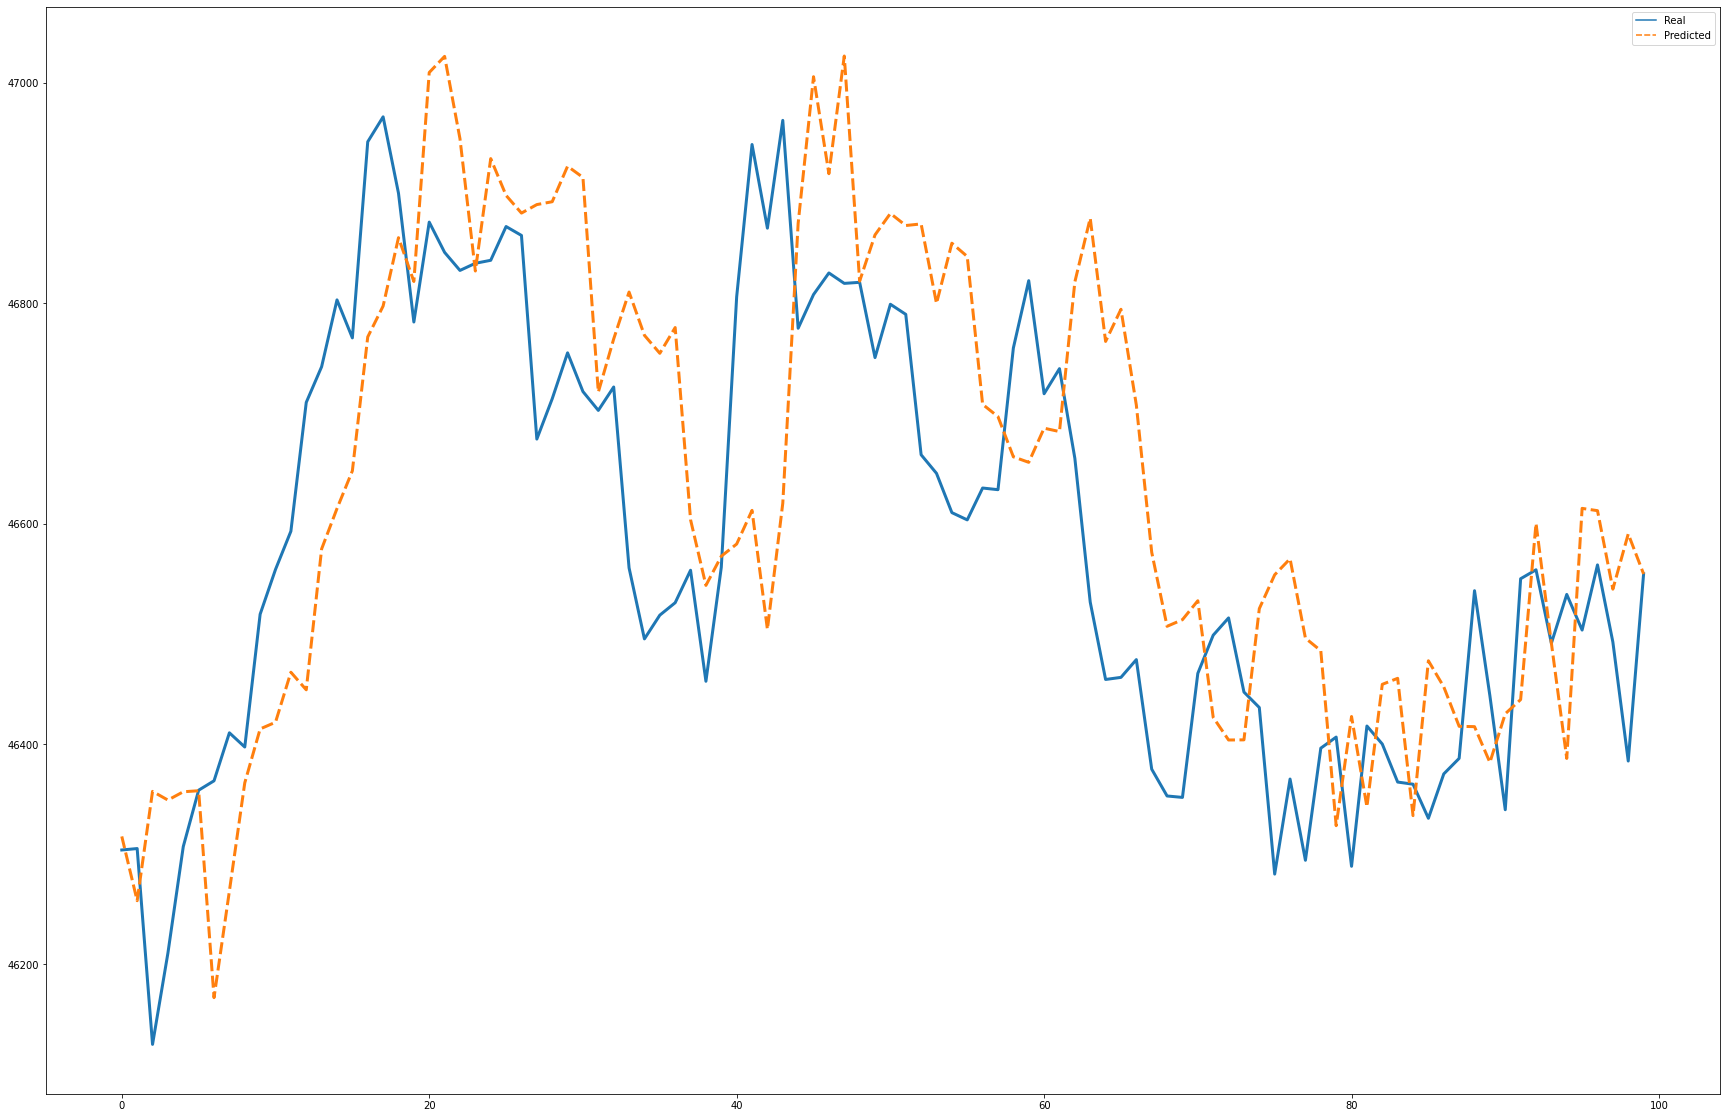

In [119]:
graph(test_y,yhat,100,4)

In [120]:
valos_target=decisionMetric(test_y)
predikalt_target=decisionMetric(yhat)

In [121]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(valos_target, predikalt_target, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.30      0.06      0.09     17454
           0       0.53      0.73      0.61     35504
           1       0.26      0.28      0.27     17954

    accuracy                           0.45     70912
   macro avg       0.37      0.35      0.33     70912
weighted avg       0.41      0.45      0.40     70912



# 20 steps 100 epoch 50 neuron

In [122]:
n_steps_in, n_steps_out = 20, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [123]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=100, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
8871/8871 [==============================] - 106s 12ms/step - loss: 6904171.5000
Epoch 2/100
8871/8871 [==============================] - 110s 12ms/step - loss: 741471.0625
Epoch 3/100
8871/8871 [==============================] - 105s 12ms/step - loss: 212941.7188
Epoch 4/100
8871/8871 [==============================] - 105s 12ms/step - loss: 21198.4629
Epoch 5/100
8871/8871 [==============================] - 105s 12ms/step - loss: 19857.7656
Epoch 6/100
8871/8871 [==============================] - 105s 12ms/step - loss: 163616.0781
Epoch 7/100
8871/8871 [==============================] - 106s 12ms/step - loss: 24898.0742
Epoch 8/100
8871/8871 [==============================] - 105s 12ms/step - loss: 34487.0742
Epoch 9/100
8871/8871 [==============================] - 105s 12ms/step - loss: 18562.7871
Epoch 10/100
8871/8871 [==============================] - 106s 12ms/step - loss: 17670.6074
Epoch 11/100
8871/8871 [==============================] - 106s 12ms/step - loss: 166

66

In [124]:
n_steps=20
test_X, test_y = split_sequence(test, 20, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [125]:
metrikak(test_y,yhat)

27916.41235555619
0.23312653591034707


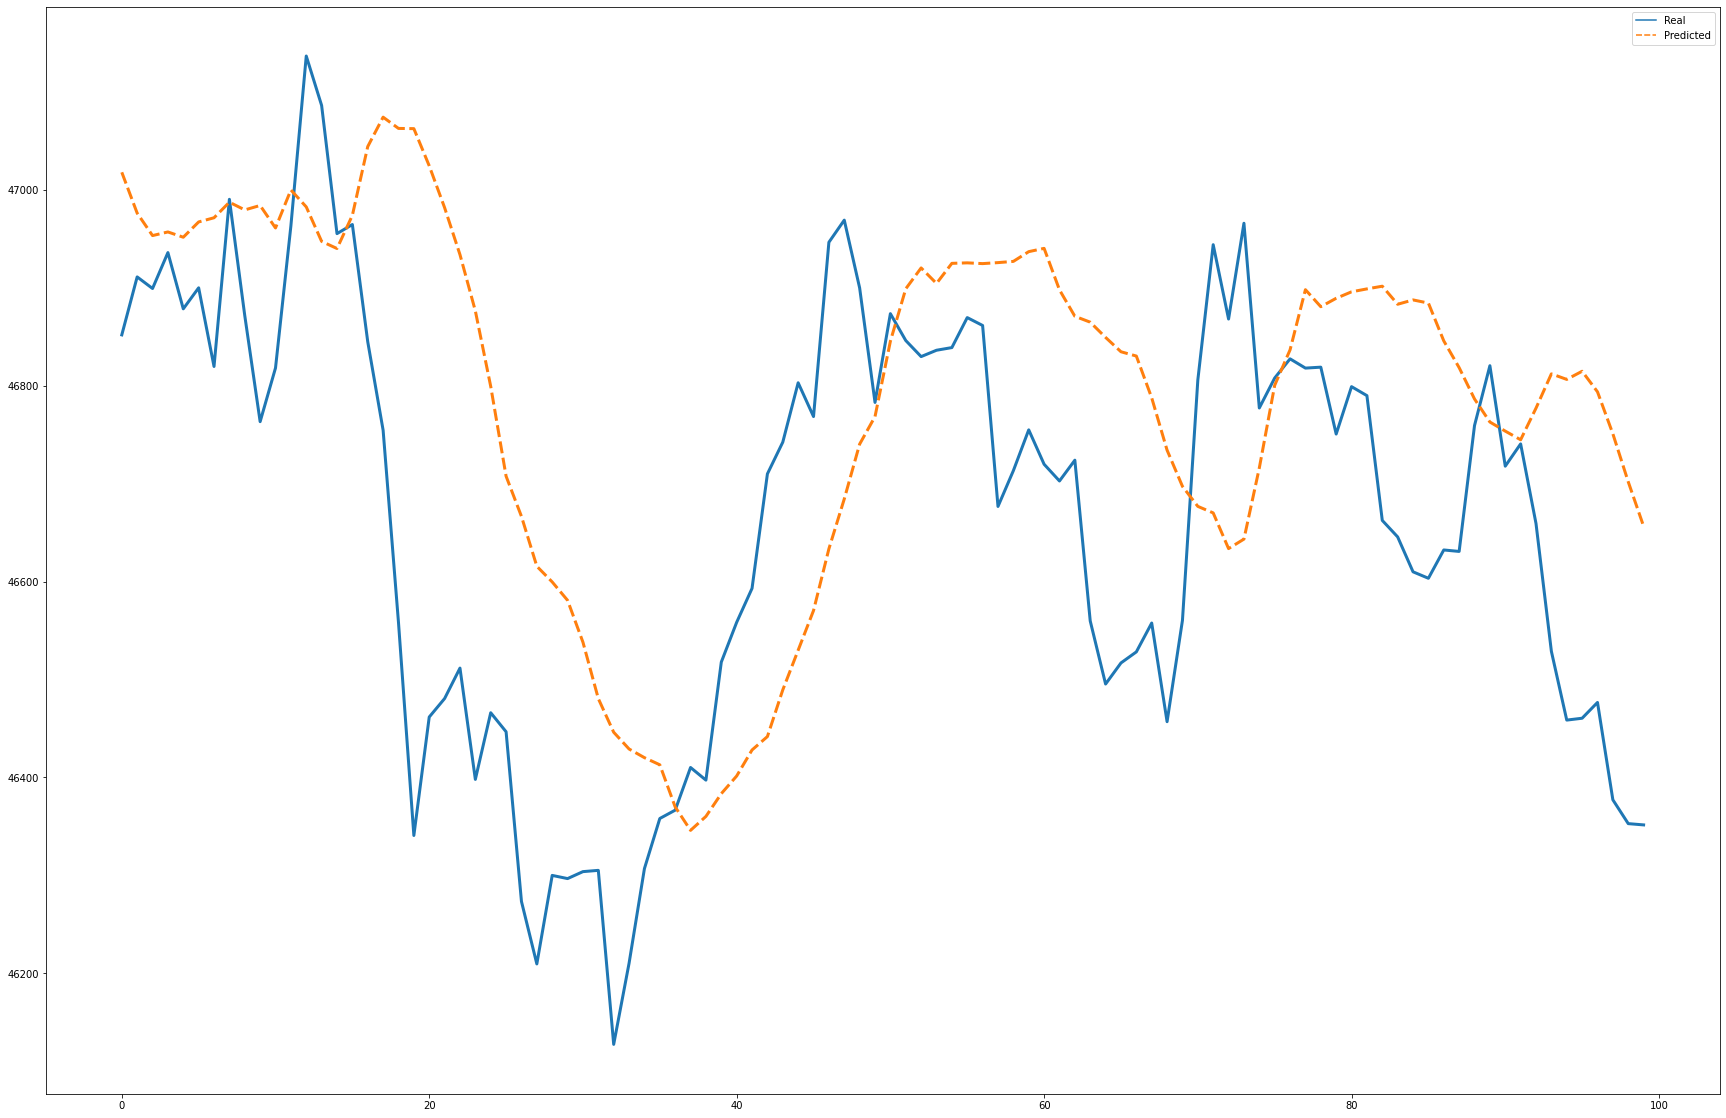

In [126]:
graph(test_y,yhat,100,4)

In [127]:
valos_target=decisionMetric(test_y)
predikalt_target=decisionMetric(yhat)

In [128]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(valos_target, predikalt_target, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.43      0.00      0.00     17470
           0       0.51      0.95      0.66     35509
           1       0.28      0.07      0.11     17963

    accuracy                           0.49     70942
   macro avg       0.41      0.34      0.26     70942
weighted avg       0.43      0.49      0.36     70942



 # 15 steps 100 epoch 50 neuron 34000

In [131]:
n_steps_in, n_steps_out = 15, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [132]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=100, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/100
8871/8871 [==============================] - 93s 10ms/step - loss: 3820941.5000
Epoch 2/100
8871/8871 [==============================] - 92s 10ms/step - loss: 794970.0000
Epoch 3/100
8871/8871 [==============================] - 92s 10ms/step - loss: 517612.6562
Epoch 4/100
8871/8871 [==============================] - 88s 10ms/step - loss: 28146.6445
Epoch 5/100
8871/8871 [==============================] - 82s 9ms/step - loss: 21546.1895
Epoch 6/100
8871/8871 [==============================] - 82s 9ms/step - loss: 71923.2188
Epoch 7/100
8871/8871 [==============================] - 82s 9ms/step - loss: 20507.4258
Epoch 8/100
8871/8871 [==============================] - 82s 9ms/step - loss: 17059.0156
Epoch 9/100
8871/8871 [==============================] - 82s 9ms/step - loss: 15886.2158
Epoch 10/100
8871/8871 [==============================] - 82s 9ms/step - loss: 14423.9414
Epoch 11/100
8871/8871 [==============================] - 82s 9ms/step - loss: 12634.8047
Epoch 12/10

28

In [134]:
n_steps=15
test_X, test_y = split_sequence(test, 15, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [135]:
metrikak(test_y,yhat)

34022.03531705082
0.26181885836294805


In [ ]:
graph(test_y,yhat,100,4)

In [ ]:
valos_target=decisionMetric(test_y)
predikalt_target=decisionMetric(yhat)

In [ ]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(valos_target, predikalt_target, target_names = classes, zero_division = 0))

# 10 steps 100 epoch 50 neuron

In [138]:
n_steps_in, n_steps_out = 10, 5
train_X, train_y = split_sequence(train, n_steps_in, n_steps_out)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))

In [139]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7)
# This callback will stop the training when there is no improvement in  
# the validation loss for three consecutive epochs.  
model = Sequential()

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=200, verbose=1, callbacks=[callback])
len(history.history['loss'])

Epoch 1/200
8871/8871 [==============================] - 65s 7ms/step - loss: 3618020.7500
Epoch 2/200
8871/8871 [==============================] - 66s 7ms/step - loss: 555127.8750
Epoch 3/200
8871/8871 [==============================] - 66s 7ms/step - loss: 16695.3027
Epoch 4/200
8871/8871 [==============================] - 66s 7ms/step - loss: 858006.4375
Epoch 5/200
8871/8871 [==============================] - 66s 7ms/step - loss: 11984.7080
Epoch 6/200
8871/8871 [==============================] - 65s 7ms/step - loss: 16550.6953
Epoch 7/200
8871/8871 [==============================] - 59s 7ms/step - loss: 14325.9863
Epoch 8/200
8871/8871 [==============================] - 59s 7ms/step - loss: 12792.2686
Epoch 9/200
8871/8871 [==============================] - 58s 7ms/step - loss: 11882.6221
Epoch 10/200
8871/8871 [==============================] - 58s 7ms/step - loss: 176584.7500
Epoch 11/200
8871/8871 [==============================] - 61s 7ms/step - loss: 12663.8926
Epoch 12/200
8

91

In [140]:
n_steps=10
test_X, test_y = split_sequence(test, 10, 5)
n_features = 1
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

#performance =model.evaluate(test_X,test_y)
#print (performance)
yhat = model.predict(test_X, verbose=0)

In [141]:
metrikak(test_y,yhat)

15257.826828150186
0.16277543248798487


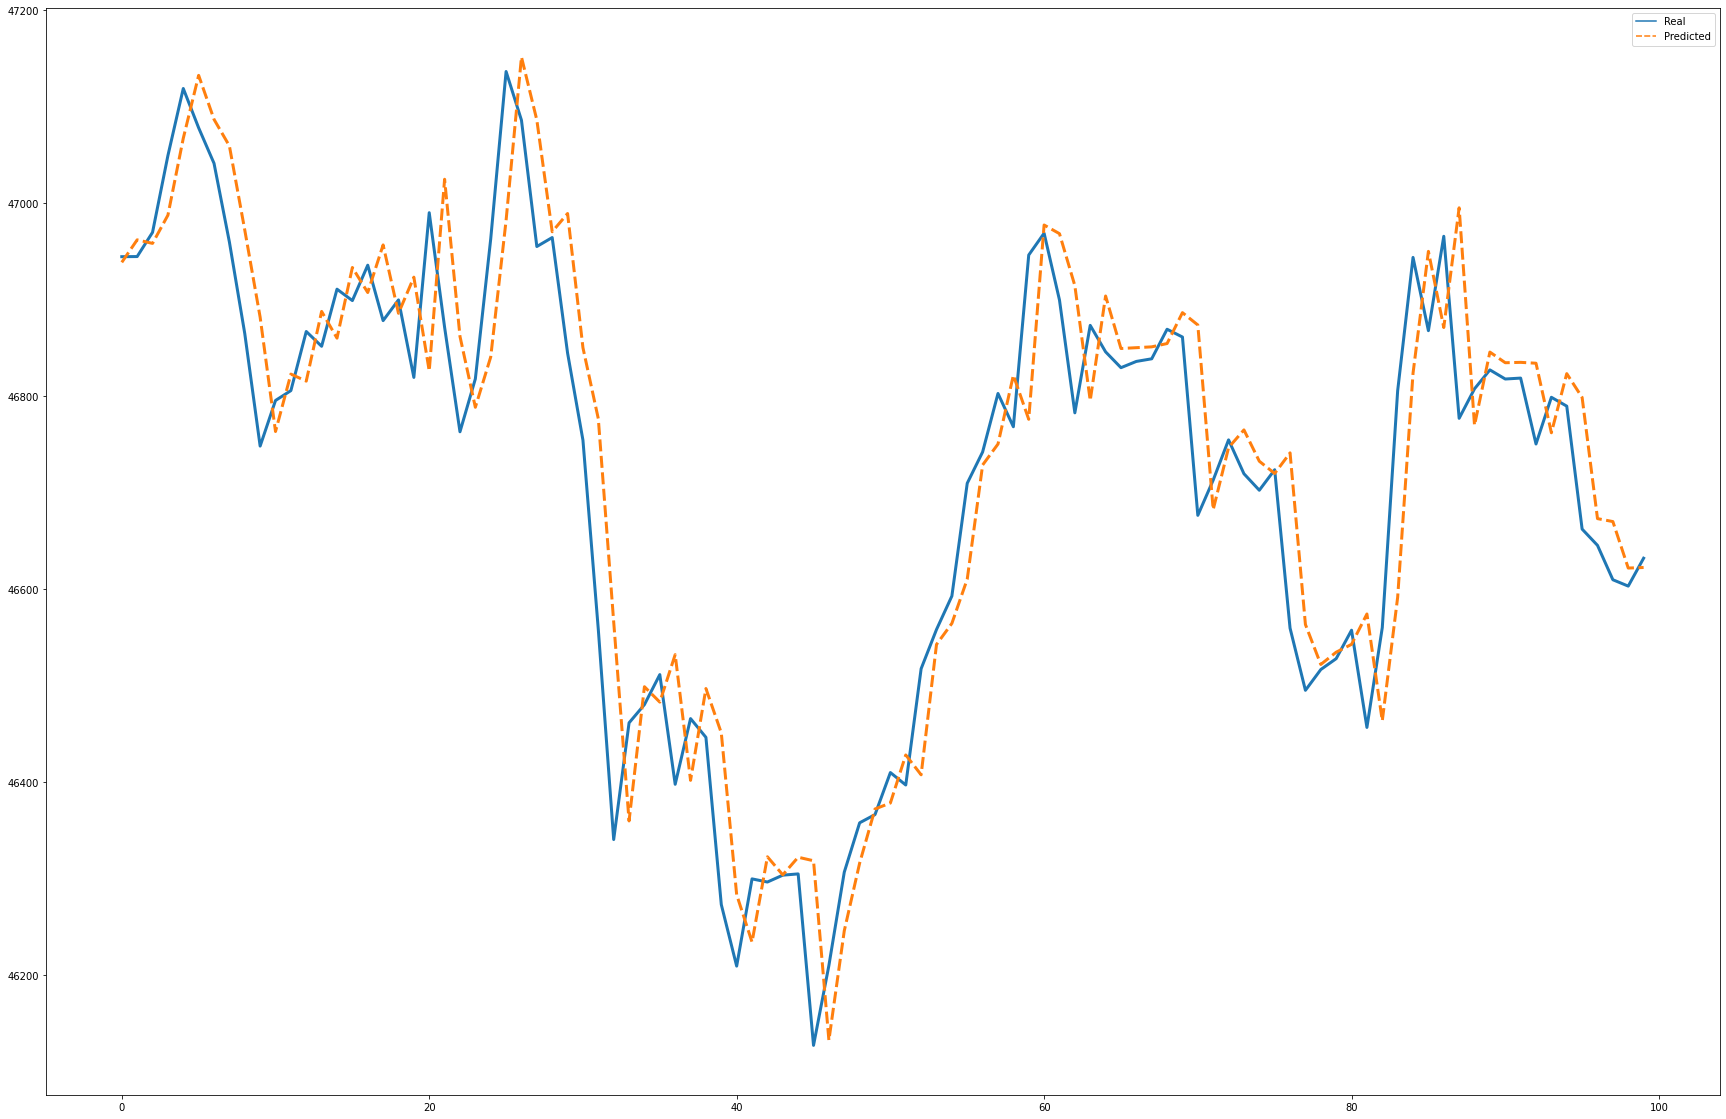

In [148]:
graph(test_y,yhat,100,1)

In [143]:
valos_target=decisionMetric(test_y)
predikalt_target=decisionMetric(yhat)

In [144]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(valos_target, predikalt_target, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.29      0.13      0.18     17475
           0       0.53      0.84      0.65     35511
           1       0.29      0.11      0.16     17966

    accuracy                           0.48     70952
   macro avg       0.37      0.36      0.33     70952
weighted avg       0.41      0.48      0.41     70952



# Multivariate LSTM model

In [31]:
train=data[:10000]
test=data[int(len(data)*0.8):]

In [32]:
# Step 1 : convert to [rows, columns] structure
x_1 = train['time'].values.reshape((len(train['time']), 1))
x_2 = train['high'].values.reshape((len(train['high']), 1))

y = train['close'].values.reshape((len(train['close']), 1))
print ("x_1.shape" , x_1.shape) 
print ("x_2.shape" , x_2.shape) 
print ("y.shape" , y.shape)
# Step 2 : normalization 
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
y_scaled = scaler.fit_transform(y)
# Step 3 : horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, y_scaled))
print ("dataset_stacked.shape" , dataset_stacked.shape)

x_1.shape (10000, 1)
x_2.shape (10000, 1)
y.shape (10000, 1)
dataset_stacked.shape (10000, 3)


In [5]:
in_seq1=train['time'].values
in_seq2=train['high'].values
in_seq3=train['open'].values
in_seq4=train['low'].values
out_seq=train['close'].values


in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
dataset = hstack((in_seq1, in_seq2, in_seq3, in_seq4, out_seq))

In [10]:
dataset_half=dataset[:10000]

In [33]:
# split a multivariate sequence into samples
def split_sequences_multi(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return array(X), array(y)

In [34]:
X, y = split_sequences_multi(dataset_half, n_steps_in, n_steps_out)
print ("X.shape" , train_X.shape) 
print ("y.shape" , train_y.shape)

X.shape (9977, 20, 4)
y.shape (9977, 5)


In [35]:
split_point = 1258*25
train_X , train_y = X[:split_point, :] , y[:split_point, :]
test_X , test_y = X[split_point:, :] , y[split_point:, :]

In [36]:
#optimizer learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(loss='mse' , metrics=['mse'])